Load and preprocess dataset

In [1]:
import pathlib
import pandas as pd
import numpy as np

dataset_path = next((pathlib.Path.cwd().parent / "reddit-sentiment").glob("*.csv"))
df = pd.read_csv(dataset_path)

# https://stackoverflow.com/a/34258961 and 
df["date"] = pd.to_datetime((np.asarray(df['year'], dtype='datetime64[Y]')-1970)+(np.asarray(df['day'], dtype='timedelta64[D]')-1))
df = df.set_index("date")

In [2]:
df.head(15)

,year,day,subreddit,avg_polarity,avg_subjectivity,count
date,,,,,,
2005-12-12,2005,346,reddit.com,0.059489,0.313904,76
2005-12-18,2005,352,reddit.com,0.066328,0.358076,34
2005-12-22,2005,356,reddit.com,0.113660,0.440575,70
2005-12-23,2005,357,reddit.com,0.129018,0.353833,94
2005-12-24,2005,358,reddit.com,0.119258,0.417002,92
2005-12-25,2005,359,reddit.com,0.119466,0.431318,94
2005-12-26,2005,360,reddit.com,0.093808,0.427382,76
2005-12-27,2005,361,reddit.com,0.113608,0.394427,114
2005-12-28,2005,362,reddit.com,0.144086,0.438743,122


Inspect the number of subreddits over time

In [3]:
df[["year", "subreddit"]].groupby("year").nunique("subreddit")

,subreddit
year,
2005,1
2006,34
2007,46
2008,2695


Number of total posts on reddit over time

<AxesSubplot: xlabel='date'>

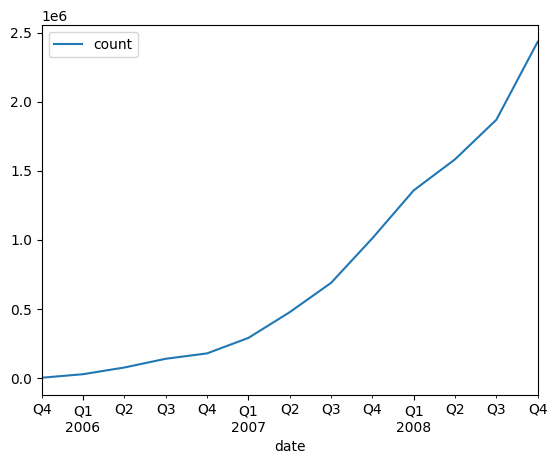

In [4]:
df[["count"]].resample("Q").sum("count").plot(kind="line")

How steady are subreddits over time? Do we have the same number of posts every day?